In [1]:
from torchvision import transforms
from torch.utils.data import DataLoader
import os
import sys
import pandas as pd

sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from lepidoptera_dataset import LepidopteraDataset
from utils_helpers import show_sample, check_folder_exists

### Specify paths and filter variables

In [ ]:
PATH_TO_DATA = '/home/lgierz/BA_MothClassification/data/'
PATH_TO_LABELS = PATH_TO_DATA + 'processed/dataset_top589_max3000.csv'
PATH_TO_IMAGES = '/mnt/data/lgierz/moth_dataset_top589_max3000'
check_folder_exists(PATH_TO_IMAGES)
csv_file = pd.read_csv(PATH_TO_LABELS)


STATES_TO_FITER = []
SPECIES_TO_FILTER = []
GBIFIDS_TO_FILTER = []

AMOUNT = 3

### Filtering the dataset

In [ ]:
ds_slice = csv_file

# slice down for wanted share of dataset
if len(STATES_TO_FITER) > 0: 
    ds_slice = ds_slice[ds_slice['status'].isin(STATES_TO_FITER)]
if len(SPECIES_TO_FILTER) > 0: 
    ds_slice = ds_slice[ds_slice['scientificName'].isin(SPECIES_TO_FILTER)]
if len(GBIFIDS_TO_FILTER) > 0: 
    ds_slice = ds_slice[ds_slice['gbifID'].isin(GBIFIDS_TO_FILTER)]


ds_slice = ds_slice.sample(AMOUNT)


ds_slice.reset_index(drop=True, inplace=True)



print(f'Amount of samples in slice: {len(ds_slice)}')
ds_slice

Amount of samples in slice: 5


,gbifID,scientificName,identifier,status
0,4056166143,Agapeta hamana,https://observation.org/photos/53480764.jpg,BLACK
1,1974643572,Biston strataria,https://observation.org/photos/10453362.jpg,BLACK
2,1964791276,Carcina quercana,https://observation.org/photos/18821596.jpg,BLACK
3,3725262763,Catocala sponsa,https://observation.org/photos/17712827.jpg,BLACK
4,3728033111,Conistra rubiginosa,https://observation.org/photos/32456182.jpg,BLACK


### Transforming the dataset

In [13]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ResNet input size
    transforms.ToTensor(),          # Convert to tensor
])

dataset = LepidopteraDataset(csv_file=ds_slice, root_dir=PATH_TO_IMAGES, transform=transform)
dataloader = DataLoader(dataset, batch_size=100, shuffle=False)

[LEPIDOPTERA_DATASET] In-memory index built.


### Displaying single images with label data

Displaying a total of 5 images...
GBIF: 4056166143


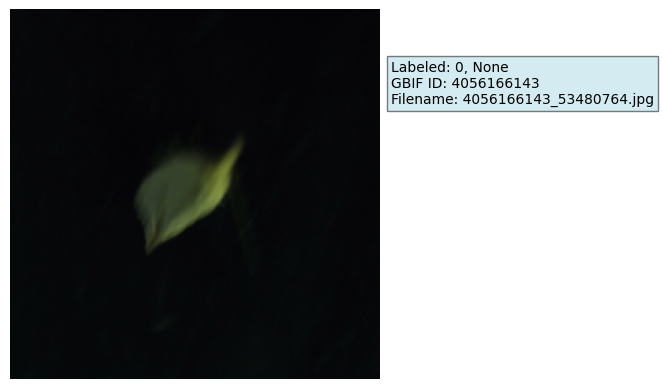

GBIF: 1974643572


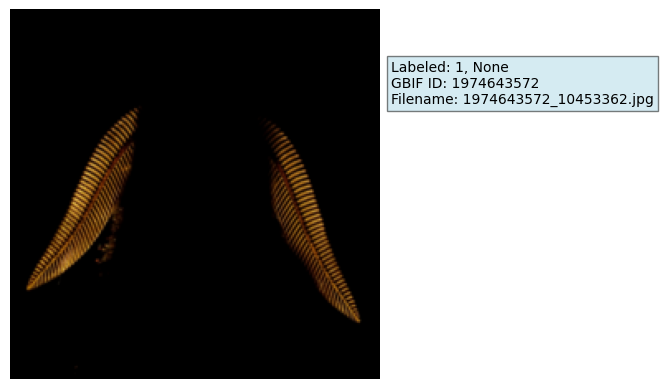

GBIF: 1964791276


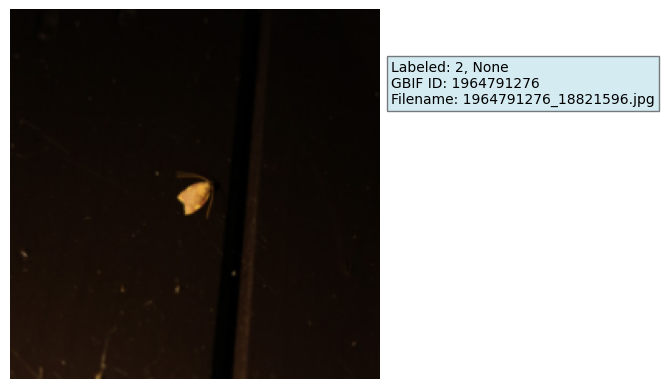

GBIF: 3725262763


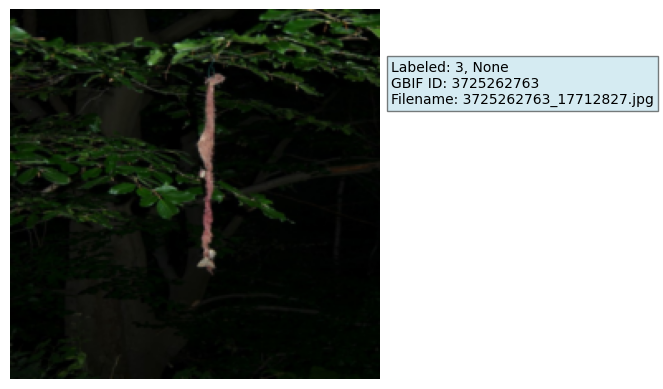

GBIF: 3728033111


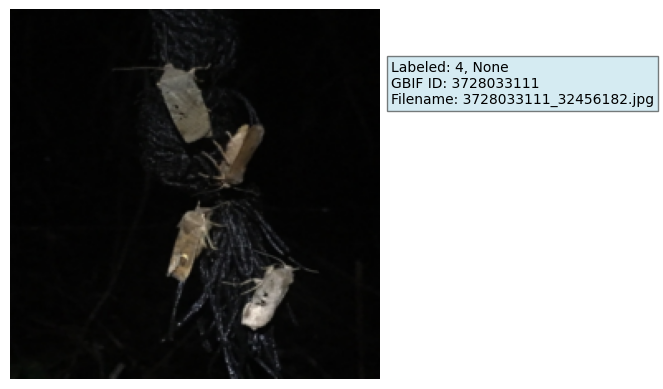

In [14]:

print(f'Displaying a total of {len(ds_slice)} images...')
for images, labels, gbifids, img_names in dataloader:
    for index, _ in enumerate(labels):
        #label_dec = dataset.decode_label(labels[index])
        label_dec=None
        print(f'GBIF: {gbifids[index]}')
        show_sample(images[index], labels[index],label_dec, gbifids[index], img_names[index])

